# <font color='#31394d'> Random Forests Practice Exercise </font>

In this exercise we're going to use the famous <a href="https://archive.ics.uci.edu/ml/datasets/iris" target="_blank">Iris dataset</a> to determine the species of iris using a random forest classifier. Begin by importing the necessary libraries and loading the Iris dataset from sklearn.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import SCORERS

In [36]:
data = datasets.load_iris()

# for display purposes
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris["target"] = data.target
iris.tail(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
130,7.4,2.8,6.1,1.9,2
131,7.9,3.8,6.4,2.0,2
132,6.4,2.8,5.6,2.2,2
133,6.3,2.8,5.1,1.5,2
134,6.1,2.6,5.6,1.4,2
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,2
139,6.9,3.1,5.4,2.1,2


In [37]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
iris.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

### There are 3 classes to classify the output

In [39]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [40]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<AxesSubplot:>

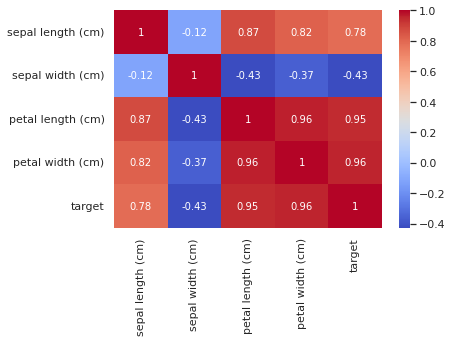

In [41]:
corr = iris.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

### Strong Relations with Target:
- Petal Width
- Petal Length
- Sepal Length

🚀 <font color='#D9C4B1'>Exercise: </font> Build a random forest classifier, train and evaluate it using cross-validation. You can use the functions below.

In [70]:
def evaluate_model(estimator):
    cv_results = cross_validate(estimator, X, y, scoring='accuracy', n_jobs=-1, cv=10, return_train_score=True)
    return pd.DataFrame(cv_results).abs().mean().to_dict()

def display_results(results):
    results_df  = pd.DataFrame(results).T
    results_cols = results_df.columns
    for col in results_df:
        results_df[col] = results_df[col].apply(np.mean)
    return results_df

In [43]:
# split target and independent variables
X = iris.drop(['target'], axis = 1)
y = iris['target']

In [44]:
# train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =4)

In [45]:
print("Training Features Shape: ",X_train.shape)
print("Training Target Shape: ",y_train.shape)
print("Testing Features Shape: ",X_test.shape)
print("Testing Target Shape: ",y_test.shape)

Training Features Shape:  (105, 4)
Training Target Shape:  (105,)
Testing Features Shape:  (45, 4)
Testing Target Shape:  (45,)


### 1. Random Forest Classifier

In [56]:
# Feature Scaling /Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Training the RFC 
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state =3)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=3)

In [59]:
y_hat = classifier.predict(X_test)
y_hat[:20]

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2])

### Model Evaluation

1. Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_hat)
pd.DataFrame(cm, index=['true0', 'true1', 'true2'], columns = ['pred0', 'pred1', 'pred2'])

,pred0,pred1,pred2
true0,21,0,0
true1,0,10,0
true2,0,1,13


In [80]:
accuracy_score(y_test,y_hat)

0.9777777777777777

In [79]:
evaluations = evaluate_model(classifier)
print(evaluations)

{'fit_time': 0.03484761714935303, 'score_time': 0.00767829418182373, 'test_score': 0.9533333333333334, 'train_score': 0.9955555555555555}


🚀 <font color='#D9C4B1'>Exercise: </font> Adjust the hyperparameters (e.g. number of trees). Does model performance decrease or increase? 

In [76]:
trees = np.arange(11,25)
results = []

for tree in trees:
  best_rfc = RandomForestClassifier(n_estimators = tree)
  results.append(cross_val_score(best_rfc,X,y,scoring = 'accuracy',cv = 10).mean())


In [77]:
test = pd.DataFrame({'trees':trees, 'mean_acc': results})
test.sort_values('mean_acc',ascending = False)

,trees,mean_acc
2,13,0.966667
3,14,0.966667
11,22,0.966667
0,11,0.960000
4,15,0.960000
5,16,0.960000
8,19,0.960000
9,20,0.960000
10,21,0.960000
12,23,0.960000


### Increasing the trees makes the model perform slightly less accurately. from 0.977777 to 0.9666667